In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
sns.set_style("dark")

In [0]:
def plot_clusters(points, cluster_labels,offset=0.1,show_annotation=True):
  cluster_labels=np.array(cluster_labels)
  un_clusters=np.unique(cluster_labels)
  points=np.array(points)
  samples=points.shape[0]



  for cluster in un_clusters:
    if(cluster_labels == cluster).any():
      plt.scatter(points[cluster_labels==cluster,0],points[cluster_labels==cluster,1],label=cluster)

  if show_annotation:
    for i in range(samples):
      plt.annotate(i,(points[i,0]+offset,points[i,1]+offset))
  plt.legend()


[ True  True  True  True  True  True  True  True  True  True]


In [0]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))

False
(10, 2)


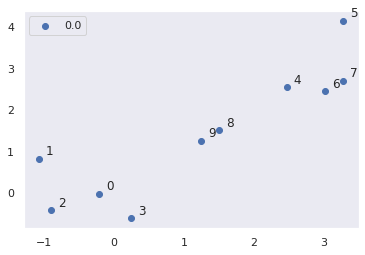

In [0]:
cluster_labels= np.zeros((10)).tolist()

print(cluster_labels==0)
# print(cluster_labels)
offset=0.1
print(points.shape)
plot_clusters(points,cluster_labels,offset)
plt.show()


(10, 2)


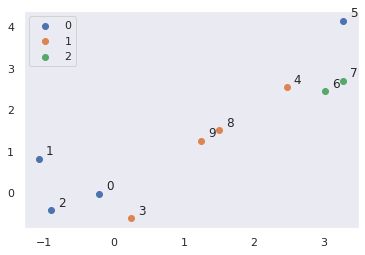

In [0]:
cluster_labels= np.array([0,0,0,1,1,0,2,2,1,1])
print(points.shape)
plot_clusters(points,cluster_labels,offset)
plt.show()


In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

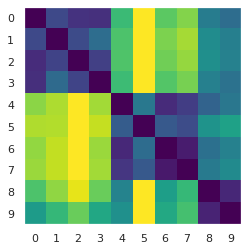

In [0]:
grid = euclidean_distances(points,points)
grid = (grid-grid.min(axis=1)[:,None])/(grid.max(axis=1)[:,None]-grid.min(axis=1)[:,None])
xlabels = np.arange(0,points.shape[0])
ylabels=np.arange(0,points.shape[0])
heatmap(grid,xlabels,ylabels,xrot=0)

In [0]:
def initialise(points,K):
  a=points
  np.random.shuffle(a)
  return a[0:K][:]

b=np.array([[10,10],[2,2],[1,5],[5,7],[1,5],[0,0]])
k=initialise(b,2)
print(k)
def assign(points,clustercenters):
  q=clustercenters.shape[0]
  clusterlabels=np.zeros((q))
  dist=euclidean_distances(points,clustercenters)
  cluster_labels=np.argmin(dist,axis=1)
  return cluster_labels
print(b)
clusterlabels=assign(b,k)
print(b)
print(clusterlabels)

[[ 5  7]
 [10 10]]
[[ 5  7]
 [10 10]
 [ 2  2]
 [ 1  5]
 [ 0  0]
 [ 1  5]]
[[ 5  7]
 [10 10]
 [ 2  2]
 [ 1  5]
 [ 0  0]
 [ 1  5]]
[0 1 0 0 0 0]


In [0]:
def recalculate_cluster_centers(points,clusterlabels,K):
    clustercenters=np.zeros((K,2))
    # print(un_clusters)
    for label in range(K):
      clustercenters[label,:]=points[clusterlabels==label,:].mean(axis=0)
    return clustercenters

calcnewmean(b,k,clusterlabels)

[0 1]


array([[ 1,  2],
       [20, 10]])

In [0]:

np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster_centers = np.array([[0,0], [1,1], [2,2]])
cluster_labels = assign(points,cluster_centers)
cluster_centers=recalculate_cluster_centers(points, cluster_labels,3)
print(cluster_centers)

[[-0.48043851 -0.06287893]
 [ 1.375       1.375     ]
 [ 3.00926244  2.95863941]]


In [0]:
def KMeans(points,K):
  cluster_labels= np.zeros((points.shape[0]))

  cluster_centers = initialise(points,K)

  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)

  while not (old_cluster_centers==initial_centers).all():
    old_cluster_centers=cluster_centers.copy()

    #assign
    cluster_labels=assign(points,cluster_centers)

    #recalculate

    cluster_centers = recalculate_cluster_centers(points,cluster_labels,K)
  return cluster_labels, initial_centers, cluster_centers


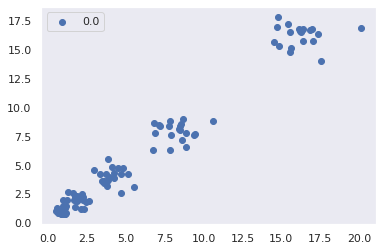

In [0]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

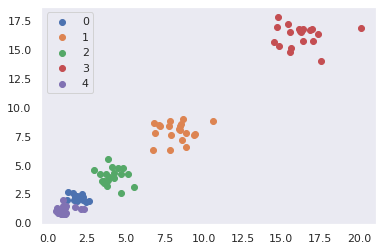

In [0]:
cluster_labels, initial_centers, cluster_centers = KMeans(points,K)
plot_clusters(points,cluster_labels,show_annotation=False)
# plt.scatter(cluster_centers[:][0],cluster_centers[:][1],marker="X",label='center')
# print(cluster_centers)

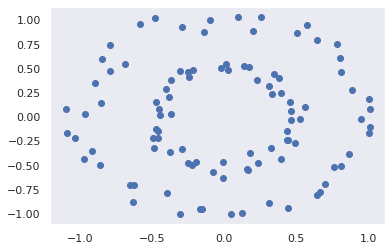

In [0]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])
K=2

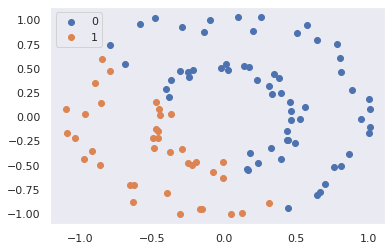

In [0]:
cluster_labels, initial_centers, cluster_centers = KMeans(points,K)
plot_clusters(points,cluster_labels,show_annotation=False)

(100,)
(100,)


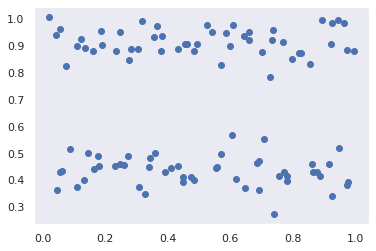

In [0]:
#convert to r,theta and use kmeans
points, _ = make_circles(100, noise=0.06, factor=0.5)
K=2
r = np.sqrt(points[:,0]**2+points[:,1]**2)
t = np.arctan2(points[:,1],points[:,0])
print(r.shape)
print(t.shape)
newpoints=np.zeros((points.shape[0],2))
for i in range(points.shape[0]):
  newpoints[i][1]=float(r[i]/1.1)
  newpoints[i][0]=float((-t[i]+3.14)/(2*3.14))
points=newpoints
plt.scatter(points[:,0], points[:,1])

In [0]:
a=np.array([[-1,0.2],[-1,1.1]])

Text(0, 0.5, 'R')

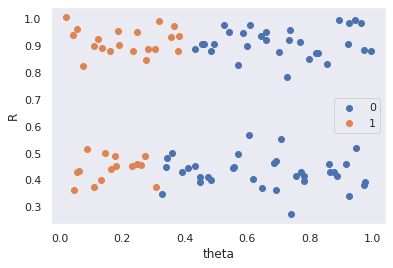

In [0]:
cluster_labels, initial_centers, cluster_centers = KMeans(points,K)
plot_clusters(points,cluster_labels,show_annotation=False)
plt.xlabel("theta")
plt.ylabel("R")

In [0]:
import pandas as pd
import json, os

df = pd.read_csv("./tmdb_5000_movies.csv")

data = {}
num_choices = 5

try:
    with open("final.json", "r") as f:
        data = json.load(f)
except:
    ip = input("Enter your name: ").strip()
    while ip == "":
        ip = input("Enter your name: ")
        
    data["username"] = ip
    data["movie_ids"] = []
    data["genre_freq"] = {}
    data["genre_freq_divided"] = {}
    
    for i in range(df.shape[0]):
        genres = json.loads(df["genres"].iloc[i])
        for genre in genres:
            data["genre_freq"][genre["name"]] = 0
            data["genre_freq_divided"][genre["name"]] = 0
            
while len(data["movie_ids"]) != df.shape[0]:
    num_idxs = min(df.shape[0]-len(data["movie_ids"]), num_choices)
    idxs = np.random.choice(df.shape[0], size=num_idxs, replace=False)
    
    print("-"*100)
    for i,idx in enumerate(idxs.tolist()):
        while df["id"].iloc[idx] in data["movie_ids"]: 
            idx = np.random.randint(0, df.shape[0])

        print("{}) {}".format(i, df["title"].iloc[idx]))

    ip = int(input("Preferred Movie: "))
    if not 0<=ip<num_choices:
        print("No option selected. Skipping...")
        continue
    
    chosen_loc = idxs[i]
    genres = json.loads(df["genres"].iloc[chosen_loc])
    for genre in genres:
        data["genre_freq"][genre["name"]] += 1
        data["genre_freq_divided"][genre["name"]] += 1/len(genres)

    data["movie_ids"].append(int(df["id"].iloc[chosen_loc]))

    with open("final.json", "w") as f:
        json.dump(data, f)

Enter your name: Aman
----------------------------------------------------------------------------------------------------
0) Just Go with It
1) Poetic Justice
2) Sky High
3) Bridget Jones's Diary
4) Pink Flamingos
Preferred Movie: 0
----------------------------------------------------------------------------------------------------
0) Kung Pow: Enter the Fist
1) You Got Served
2) Caramel
3) Ask Me Anything
4) Sweet November
Preferred Movie: 0
----------------------------------------------------------------------------------------------------
0) Baghead
1) Fiddler on the Roof
2) Head of State
3) Live and Let Die
4) I Think I Love My Wife
Preferred Movie: 3
----------------------------------------------------------------------------------------------------
0) The Theory of Everything
1) Pierrot le Fou
2) Sgt. Bilko
3) Black Book
4) Nighthawks
Preferred Movie: 0
----------------------------------------------------------------------------------------------------
0) High Tension
1) Married

ValueError: ignored

In [0]:
import json,os
from sklearn.cluster import KMeans
# f = open("final_Ammar.json", "r")
data=[]
for i in os.listdir():
  if(i[0:5]=='final'):
    f=open(i,"r")
    data.append(json.loads(f.read()))
    f.close()
b=np.zeros((1,20))
for i in range(13):
  val=list(data[i]['genre_freq_divided'].values())
  val=np.array(val)
  val=np.expand_dims(val,axis=0)
  b=np.vstack([b,val])
b=b[1:b.shape[0],:]

kmeans=KMeans(n_clusters=3, random_state=0).fit(b)
print(kmeans.labels_)
val1=[]
val2=[]
val3=[]
for i in range(13):
  val=data[i]['username']
  if(kmeans.labels_[i]==0):
    val1.append(val)
  elif(kmeans.labels_[i]==1):
    val2.append(val)
  else:
    val3.append(val)

print("Cluster one")
print(val1)
print("------")
print("Cluster two")
print(val2)
print("-----")
print("Cluster three")
print(val3)

[0 1 1 0 1 1 1 1 1 2 0 0 0]
Cluster one
['Sai Shashank', 'aryamaan', 'Sai Tanmay', 'Ayan', 'yoogottamk']
------
Cluster two
['Aman', 'ttirth', 'varun', 'abhishek', 'George', 'Avani', 'Ammar']
-----
Cluster three
['dolton']
